In [3]:
import pandas as pd

# Load your dataset
df = pd.read_csv('possion_dataset.csv')


Calculate Descriptive Statistics:
Calculate descriptive statistics such as the mean and standard deviation to get an initial understanding of your data.

In [4]:
mean_event_count = df['event_count'].mean()
std_event_count = df['event_count'].std()

print(f"Mean: {mean_event_count}, Standard Deviation: {std_event_count}")


Mean: 36.0, Standard Deviation: 5.860327153276884


Check for Poisson Characteristics:
Assess whether your data exhibits characteristics of a Poisson distribution. Typically, Poisson distributions are suitable for counting events that are rare, independent, and have a constant average rate.

Fit Poisson Distribution:
Use curve fitting to fit a Poisson distribution to your data and estimate the 

λ parameter.

In [5]:
from scipy.stats import poisson
from scipy.optimize import curve_fit

def poisson_pmf(k, lambd):
    print(f"lambd:{lambd}")
    return poisson.pmf(k, lambd)

# Use curve_fit to fit the Poisson distribution to the data
params, covariance = curve_fit(poisson_pmf, df['event_count'], [mean_event_count])

# Extract the estimated lambda parameter from the fitted parameters
estimated_lambda = params[0]

print(f"Estimated Lambda: {estimated_lambda}")
print(f"covariance: {covariance}")


lambd:1.0
lambd:1.0000000149011612
Estimated Lambda: 1.0
covariance: [[inf]]


D:\software\anaconda\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Plot the Fitted Poisson Distribution:
Visualize how well the fitted Poisson distribution matches your observed data.

In [6]:
estimated_lambda=36

Plot the Fitted Poisson Distribution:
Visualize how well the fitted Poisson distribution matches your observed data.

lambd:36


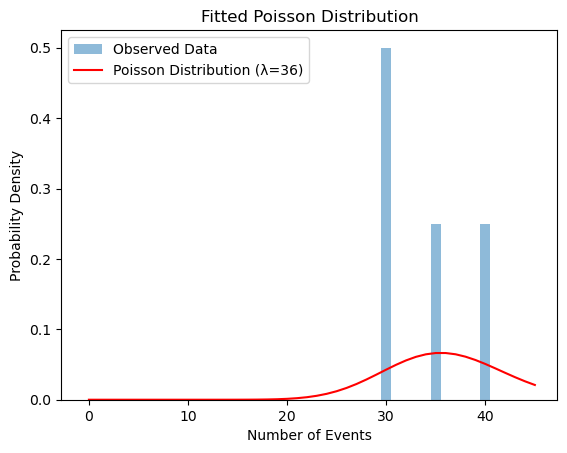

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate values for the Poisson PMF using the estimated lambda
x_values = np.arange(0, max(df['event_count']) + 1)
poisson_pmf_values = poisson_pmf(x_values, estimated_lambda)

# Plot the histogram of the data
plt.hist(df['event_count'], bins=np.arange(0, max(df['event_count']) + 1) - 0.5, density=True, alpha=0.5, label='Observed Data')

# Plot the fitted Poisson PMF
plt.plot(x_values, poisson_pmf_values, 'r-', label=f'Poisson Distribution (λ={estimated_lambda})')

plt.title('Fitted Poisson Distribution')
plt.xlabel('Number of Events')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


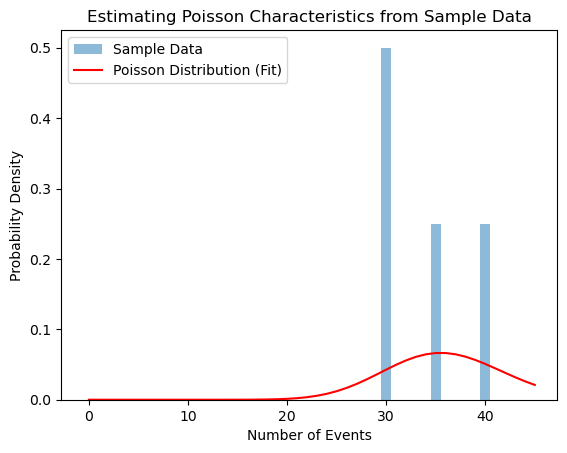

Estimated Lambda: 36.000010662665
sample_data: 0     30
1     40
2     30
3     35
4     45
      ..
95    30
96    40
97    30
98    35
99    45
Name: event_count, Length: 100, dtype: int64


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.optimize import minimize

import pandas as pd
df = pd.read_csv("possion_dataset.csv")

#Set random seed for reproducibility
#np.random.seed(42)

#Generate a sample dataset with a Poisson distribution
#lambda_true = 36  # True average rate of events per interval
#sample_size = 100
#sample_data = np.random.poisson(lambda_true, size=sample_size)
sample_data=df['event_count']
# Define the Poisson probability mass function (PMF)
def poisson_pmf(k, lambd):
    return poisson.pmf(k, lambd)

# Define the negative log-likelihood function for the Poisson distribution
def neg_log_likelihood(params, data):
    lambd = params[0]
    return -np.sum(poisson.logpmf(data, lambd))

# Initial guess for the parameter
initial_guess = [2.0]

# Use minimize to estimate the lambda parameter from the sample data
result = minimize(neg_log_likelihood, initial_guess, args=(sample_data,), method='L-BFGS-B')

# Extract the estimated lambda parameter
estimated_lambda = result.x[0]

# Generate values for the Poisson PMF using the estimated lambda
x_values = np.arange(0, max(sample_data) + 1)
poisson_pmf_values = poisson_pmf(x_values, estimated_lambda)

# Plot the histogram of the sample data
plt.hist(sample_data, bins=np.arange(0, max(sample_data) + 1) - 0.5, density=True, alpha=0.5, label='Sample Data')

# Plot the fitted Poisson PMF
plt.plot(x_values, poisson_pmf_values, 'r-', label='Poisson Distribution (Fit)')

plt.title('Estimating Poisson Characteristics from Sample Data')
plt.xlabel('Number of Events')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

#print(f"True Lambda: {lambda_true}")
print(f"Estimated Lambda: {estimated_lambda}")
print(f"sample_data: {sample_data}")